<h1 style="text-align: center; color: orange;"><b>TASK 3</b></h1>

<h3 style="text-align: left; color: yellow;"><b>Financial Data Retrieval</b></h3>

                                         Description  \
0  Walt Disney  has become the latest company to ...   
1  Landlords in some areas of the United States a...   
2  Alphabet Inc's Google said on Friday it would ...   
3  Delta Air Lines told pilots on Friday it would...   
4  The U.S. Federal Trade Commission is consideri...   

                   Company_Names                  Matched_Company  \
0                    Walt Disney        Walt Disney Company (The)   
1           Federal Reserve Bank  The Bank of New York Mellon Cor   
2                   Alphabet Inc                    Alphabet Inc.   
3                Delta Air Lines  Air Products and Chemicals, Inc   
4  U.S. Federal Trade Commission                     U.S. Bancorp   

  Stock_Ticker  Market Capitalization  P/E Ratio  Dividend Yield  
0          DIS           196849172480  39.963234          0.0082  
1           BK            60952563712  14.643103          0.0248  
2         GOOG          2433070399488  26.44106

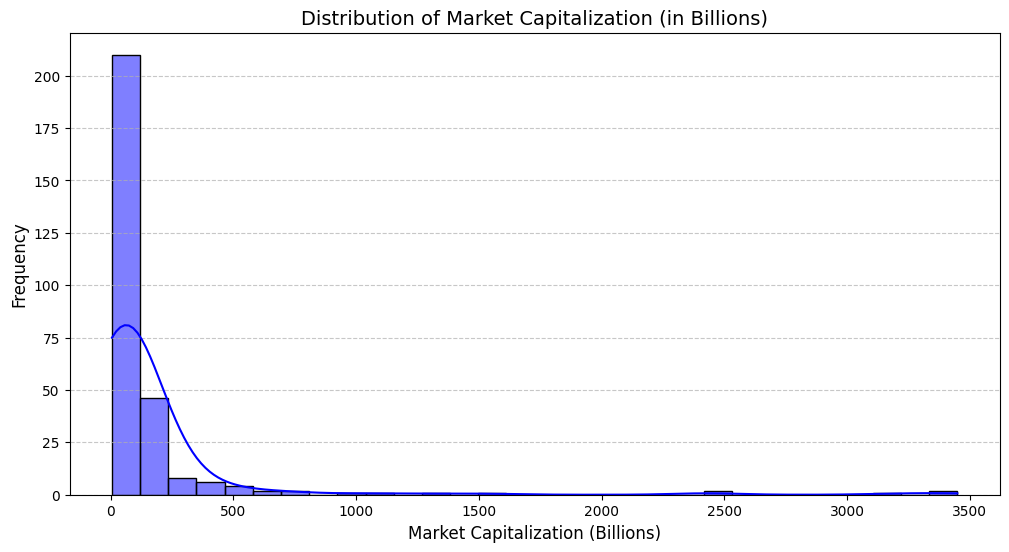

<Figure size 1400x600 with 0 Axes>

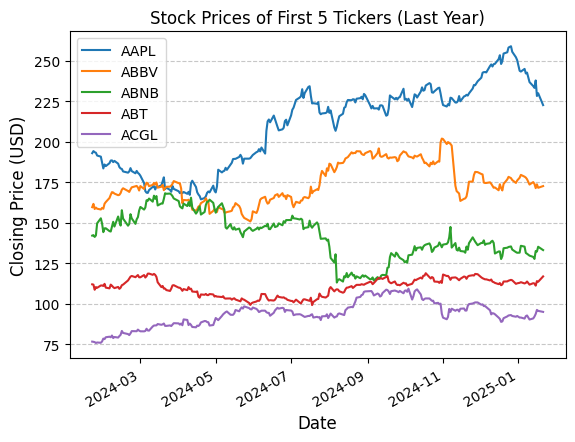

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Load the stock tickers from the previous step
file_path = r"C:\Users\SHAHBAZ\Desktop\unique_stock_companies.csv"
df = pd.read_csv(file_path)

# Get the unique stock tickers
stock_tickers = df["Stock_Ticker"].dropna().unique().tolist()

# Function to fetch key financial metrics
def get_financial_metrics(ticker):
    """
    Fetch key financial metrics for a given stock ticker using yfinance.
    """
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        return {
            "Market Capitalization": info.get("marketCap", None),
            "P/E Ratio": info.get("trailingPE", None),
            "Dividend Yield": info.get("dividendYield", None),
        }
    except Exception as e:
        print(f"Error fetching financial metrics for {ticker}: {e}")
        return None

# Function to fetch historical close prices (past 1 year)
def get_historical_prices(tickers):
    """
    Fetch historical closing prices for the past year for a list of stock tickers.
    """
    try:
        data = yf.download(tickers, period="1y", interval="1d", progress=False)
        if data.empty:
            raise ValueError("No historical data found.")
        return data["Close"]  # Extract only close prices
    except Exception as e:
        print(f"Error fetching historical prices: {e}")
        return pd.DataFrame()  # Return empty DataFrame if failed

# Fetch historical close prices for all tickers in bulk
historical_prices = get_historical_prices(stock_tickers)

# Fetch financial metrics for all tickers
financial_data = []
for ticker in stock_tickers:
    financial_metrics = get_financial_metrics(ticker)
    if financial_metrics is None:
        continue  # Skip if data is missing
    financial_data.append({"Stock_Ticker": ticker, **financial_metrics})

# Convert to DataFrame
financial_df = pd.DataFrame(financial_data)

# Merge with original stock data
final_df = df.merge(financial_df, on="Stock_Ticker", how="left")

# Save financial data
output_file = r"C:\Users\SHAHBAZ\Desktop\New_stock_financial_data.csv"
final_df.to_csv(output_file, index=False)

# Save historical prices separately (if available)
if not historical_prices.empty:
    historical_prices.to_csv(r"C:\Users\SHAHBAZ\Desktop\New_historical_prices.csv")

# Display sample results
print(final_df.head())
if not historical_prices.empty:
    print(historical_prices.head())

# ----- Visualizations -----

# 1. Market Capitalization Distribution
plt.figure(figsize=(12, 6))
sns.histplot(final_df["Market Capitalization"].dropna() / 1e9, bins=30, kde=True, color="blue")
plt.title("Distribution of Market Capitalization (in Billions)", fontsize=14)
plt.xlabel("Market Capitalization (Billions)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Historical Prices Line Plot (Example for First 5 Tickers)
if not historical_prices.empty:
    plt.figure(figsize=(14, 6))
    historical_prices.iloc[:, :5].plot(title="Stock Prices of First 5 Tickers (Last Year)")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Closing Price (USD)", fontsize=12)
    plt.legend(loc="best")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
